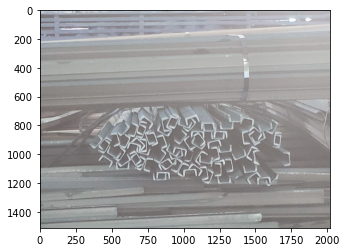

In [64]:
import cv2
import matplotlib.pyplot as plt
# import cv2
import numpy as np
from imutils.object_detection import non_max_suppression

# Reading the template
# temp = cv2.imread('C:/Users/S_G/Documents/GitHub/Shape_Detection/data/3.jpeg', cv2.IMREAD_COLOR)

# Read the original image
img = cv2.imread('C:/Users/S_G/Documents/GitHub/Shape_Detection/data/3.jpeg') 
# Display original image
plt.imshow(img)
# cv2.waitKey(0)



In [65]:
def crop(image, mask_pts):
    #imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = np.zeros(image.shape[:2], dtype="uint8")
    pts = np.array(mask_pts)
    color = 255
    cv2.fillPoly(mask, [pts], color)
    masked = cv2.bitwise_and(image, image, mask=mask)
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = image[y:y+h, x:x+w].copy()
    print(croped.shape , image.shape)
    return croped, image

def new_img(img,result,thresh):
    (y_points, x_points) = np.where(result >= thresh)
    loc = zip(x_points, y_points)
    # print(loc[0])
    result1 = img.copy()
    W, H = img.shape
    cnt1, cnt2 = 0,0
    for x in range (W):
        for y in range (H):
            cnt1 += 1
            if (x,y) not in loc:
                result1[x][y] = 0
            else: cnt2 += 1
            # print(x,y)
    print(cnt1,cnt2)
    return result1


In [66]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection




(651, 1511) (1512, 2016)
(106, 56) (651, 1511)
shape: (651, 1511)


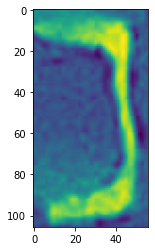

In [67]:
mask_pts = [[310,630], [1810,630], [1810,1280], [300,1280]]

croped, original = crop(img_gray, mask_pts)

mask_pts1 = [[1390,350], [1445,350], [1445,455], [1390,455]]

croped1, original1 = crop(croped, mask_pts1)
print("shape:", croped.shape)
plt.imshow( croped1)
# plt.imshow(croped)

3048192 23
1512


True

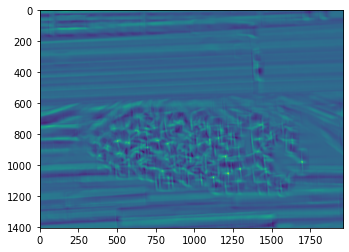

In [68]:
croped=original
result= cv2.matchTemplate(croped, croped1, cv2.TM_CCOEFF, None)
    
threshold = 0.0
 
# # Store the coordinates of matched area in a numpy array
# loc = np.where(result >= threshold)
# print(loc,loc[0])

result1 = new_img(croped,result,threshold)

print(len(result1)) 
plt.imshow(result)
cv2.imwrite('result1_1.png',result*255)

(1407, 1961) (1512, 2016)
shape (1407, 1961) (1407, 1961)


True

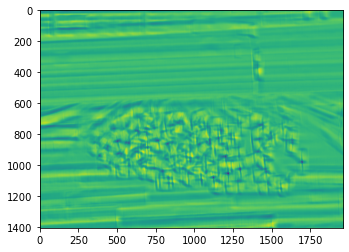

In [69]:
h,w = croped1.shape
# h,w = h-1,w-1
y,x = croped.shape
mask_pts = [[0,0], [x-w,0], [x-w,y-h], [0,y-h]]

croped_n, original = crop(croped, mask_pts)
print("shape",croped_n.shape, result.shape)
min_res = croped_n - result*255
plt.imshow(min_res)
cv2.imwrite('min_result1.png',min_res)

True

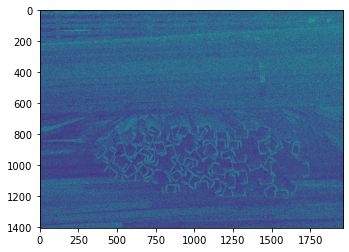

In [70]:
bitwise_and = cv2.bitwise_and(np.array(croped_n).astype(int), np.array(result*256).astype(int))
plt.imshow(bitwise_and)
cv2.imwrite('bitwise_and_1.png', bitwise_and)

True

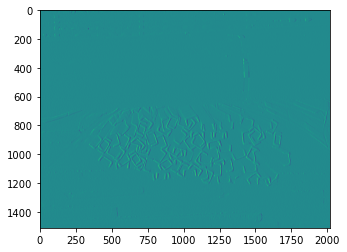

In [71]:
# Display Sobel Edge Detection Images
plt.imshow(sobelx)
cv2.imwrite('sobel_x2.png', sobelx)

True

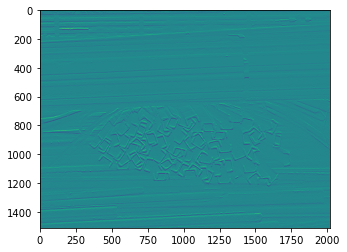

In [72]:
# cv2.waitKey(0)
plt.imshow(sobely)
cv2.imwrite('sobel_y2.png', sobely)

True

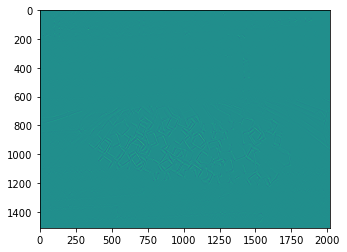

In [73]:
# cv2.waitKey(0)
plt.imshow(sobelxy)
# cv2.waitKey(0)

cv2.imwrite('sobel_xy2.png', sobelxy)

True

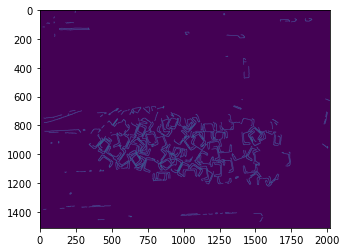

In [74]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges)
cv2.imwrite('edges_2.png', edges)

True

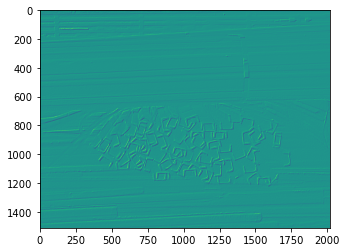

In [75]:
import numpy as np
ultimate = sobelx+sobely-sobelxy
ultimate = (ultimate-np.min(ultimate))/(np.max(ultimate)-np.min(ultimate))
plt.imshow(ultimate)
cv2.imwrite('ultimate_2.png', ultimate*255)

True

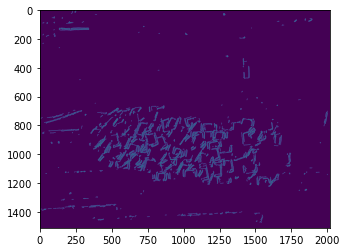

In [76]:
img1=cv2.imread("ultimate_2.png")
# Canny Edge Detection
edges2 = cv2.Canny(image=img1, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges2)
cv2.imwrite('edges2_2.png', edges2)

True

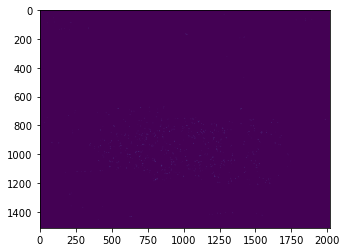

In [77]:
bitwise_and1 = cv2.bitwise_and(np.array(edges).astype(int), np.array(edges2).astype(int))
plt.imshow(bitwise_and1)
cv2.imwrite('bitwise_and1_1.png', bitwise_and1)